### 1.Import neccessary Libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

### 2.Import Train Data 

In [3]:
df=pd.read_csv("train.csv")

### 3.Check Shape of Data

In [4]:
print("Shape of data is :",df.shape)

Shape of data is : (42000, 785)


### 4.Select 10% of data from expt.

In [5]:
df1=df.sample(frac=0.1)

### 5.Print shape of Selected dataset

In [6]:
print(df1.shape)

(4200, 785)


### 6.Look at the top 5 rows

In [7]:
print(df1.head())

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
9518       7       0       0       0       0       0       0       0       0   
3518       6       0       0       0       0       0       0       0       0   
17881      4       0       0       0       0       0       0       0       0   
24514      3       0       0       0       0       0       0       0       0   
25502      6       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
9518        0  ...       157         6         0         0         0   
3518        0  ...         0         0         0         0         0   
17881       0  ...         0         0         0         0         0   
24514       0  ...         0         0         0         0         0   
25502       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
9518          0         0   

### 7.Find no.of unique class labels

In [8]:
print(df1['label'].nunique())

10


### 8.Print the no of examples for each class label 

In [9]:
print(df1['label'].value_counts())

label
1    489
4    442
2    440
6    439
9    432
3    408
7    400
5    391
8    383
0    376
Name: count, dtype: int64


### 9.Prepare X and Y

In [10]:
X = df1.drop(columns=['label']) 
Y = df1['label']

### 10.Visualization the image of first 5 digital in X-also print the class label in 

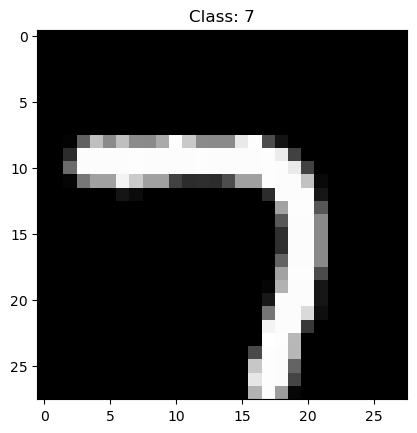

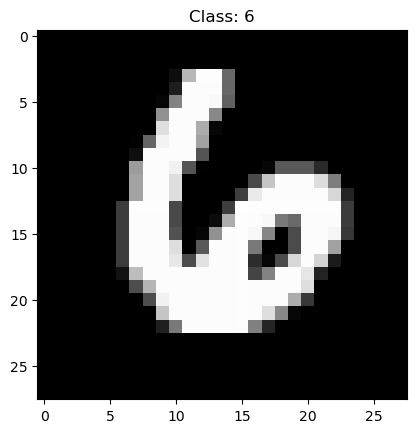

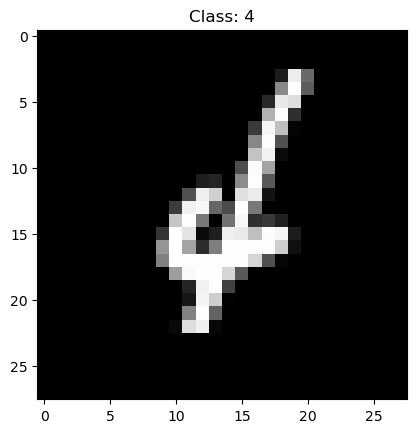

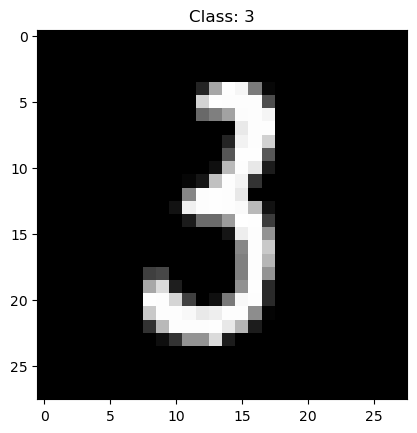

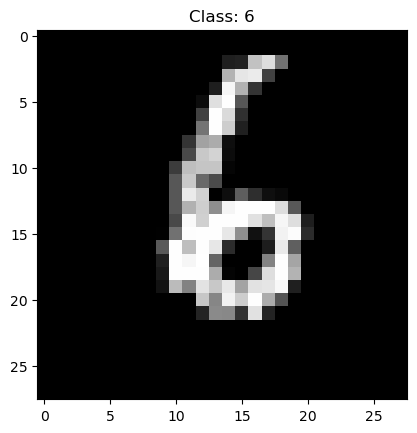

In [11]:
# Assuming dataset contains image data in pixel values
for i in range(5):
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')  # Change shape accordingly
    plt.title(f"Class: {Y.iloc[i]}")
    plt.show()

### 11.split train dataset into training(75%) & validation set(25%)

In [12]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.75, random_state=42)

### 12.Fit KNN Classifies to training data
### 13.Default parameters n-neighbors-5,metric='minkowski' p=2

In [13]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Default parameters
knn.fit(X_train, Y_train)


KNeighborsClassifier()

### 14.predict the validation set results

In [14]:
Y_pred = knn.predict(X_validation)

### 15.print confusion matrix 

In [15]:
conf_matrix = confusion_matrix(Y_validation, Y_pred)
print(conf_matrix)


[[268   0   0   0   0   1   3   0   0   0]
 [  0 384   1   0   1   0   1   0   0   0]
 [  3  21 283   3   2   2   0   4   3   2]
 [  5   9   6 277   1   6   0   4   5   2]
 [  0  15   0   0 273   0   2   2   0  28]
 [  4  13   0  16   7 246   3   0   2   4]
 [  5  10   1   0   3   7 305   0   0   0]
 [  1  14   0   1   4   0   0 265   0  19]
 [  3  21   2  10   6  14   2   2 216  11]
 [  1   2   0   4  24   2   0  11   1 271]]


In [16]:
from sklearn.metrics import ConfusionMatrixDisplay


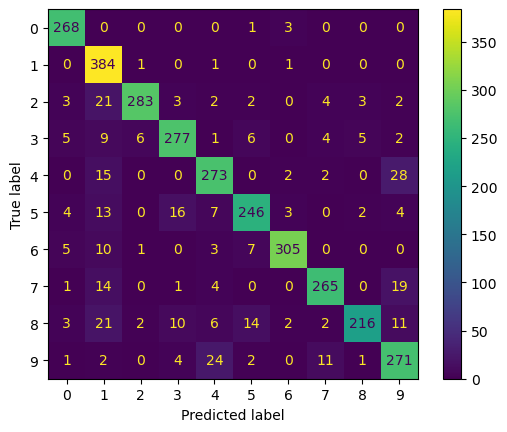

In [17]:
ConfusionMatrixDisplay.from_predictions(Y_validation, Y_pred, cmap='viridis')

### 16.printing classification report and accuracy

In [26]:
print(classification_report(Y_validation, Y_pred))
print(f"Accuracy: {accuracy_score(Y_validation, Y_pred)*100:.2f} %")
print(f"Accuracy: {accuracy_score(Y_validation, Y_pred) * 100:.2f}%")

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       272
           1       0.79      0.99      0.88       387
           2       0.97      0.88      0.92       323
           3       0.89      0.88      0.88       315
           4       0.85      0.85      0.85       320
           5       0.88      0.83      0.86       295
           6       0.97      0.92      0.94       331
           7       0.92      0.87      0.90       304
           8       0.95      0.75      0.84       287
           9       0.80      0.86      0.83       316

    accuracy                           0.89      3150
   macro avg       0.89      0.88      0.89      3150
weighted avg       0.89      0.89      0.89      3150

Accuracy: 88.51 %
Accuracy: 88.51%


### 17.Visualize the image of first 5 digits in X-test also print the predicted

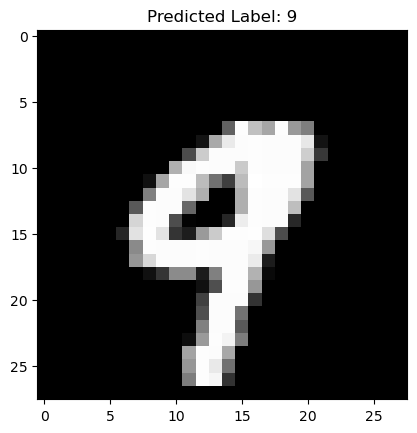

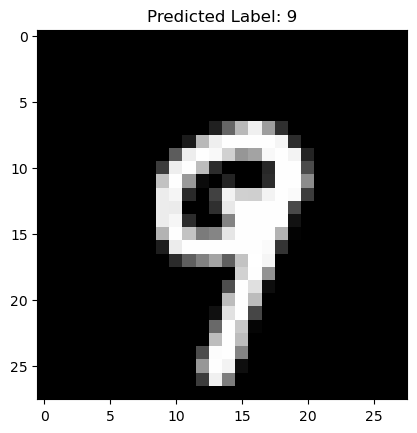

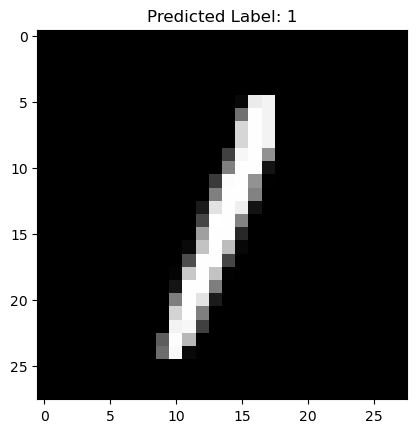

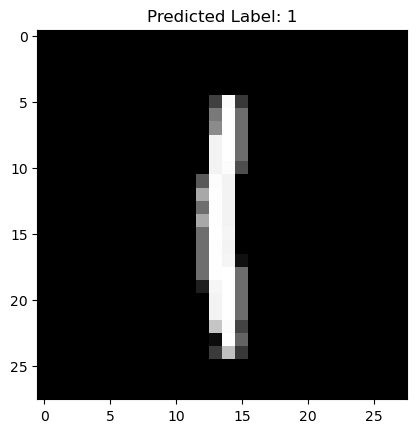

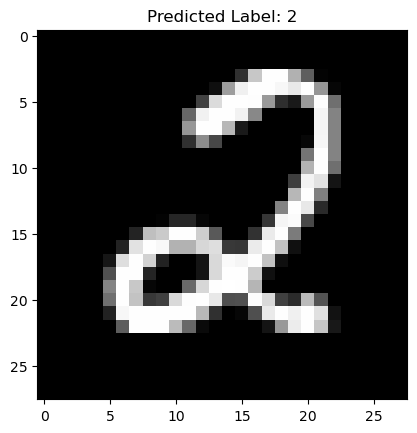

In [19]:
for i in range(5):
    plt.imshow(X_validation.iloc[i].values.reshape(28, 28), cmap='gray')  # Change shape if needed
    plt.title(f"Predicted Label: {Y_pred[i]}")
    plt.show()


4


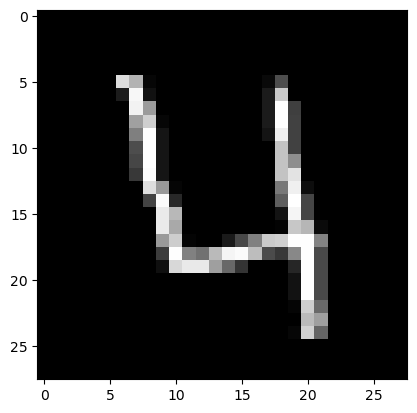

In [20]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df.head()
df.shape
df.info
df.head(1)
#to convert into image
plt.imshow(df.iloc[3, 1:].values.reshape(28, 28), cmap='grey')
print(df.iloc[3, 0])
#take only 10% of total data since applying knn
mf = df.sample(frac=0.10)
y = mf.iloc[:, 0]
X = mf.iloc[:, 1:]